# Inference tests

In [37]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src")

from stochastic_glv_generator import *
from experiments import *
from inference import *

In [74]:
n = 3
seed = 1
r_max = 1.
A_diag_std = 1.
A_off_diag_std = 10.

p = sort_glv_params(n, seed, r_max, A_diag_std, A_off_diag_std)
r = p[:n]
A = p[n:].reshape((n, n))
x_eq = -np.linalg.inv(A)@r
print(x_eq)

np.random.seed(12)
init_perturb = np.random.choice([-1., 1.], n)
init_perturb[init_perturb<0] *= np.random.uniform(0, 0.95, (init_perturb<0).sum())
init_perturb[init_perturb>0] *= np.random.uniform(0, 5, (init_perturb>0).sum())
# perturb_scale_list = np.array([0.3, 0.5, 0.8, 1.])
perturb_scale_list = np.random.uniform(0, 1, 10)
t_samp_list = np.linspace(0, 20, 60).reshape((1,-1))
meas_noise_list = np.array([0.05])
repetitions = 1

env_noise = 0.02
t0 = 0
dt = 1e-2

replicates = gen_replicates(p, env_noise, init_perturb, perturb_scale_list, t0, dt, t_samp_list, meas_noise_list, repetitions, seed=0, scale_meas_noise_by_abund=True)

new matrix 1[0.1192381  0.25916698 0.10143348]
10/10                                                                                               

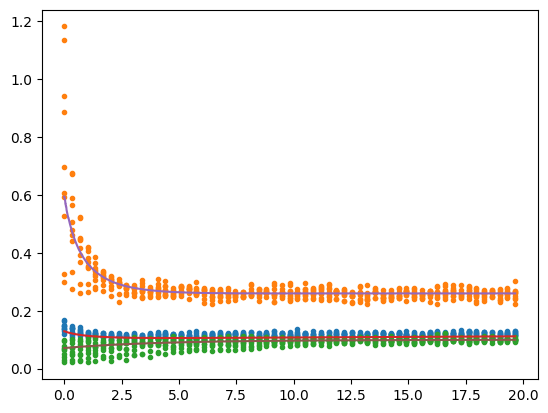

In [79]:
t = replicates.dropna()["time"].values
y = replicates.dropna()[[i for i in replicates.columns if i[:2]=="sp"]].values

r_est, A_est = fit_elasticnet_cv(replicates, "geom")
p_est = np.concatenate((r_est, A_est.flatten()))

t_pred = np.arange(t[0], t[-1], dt)
y_pred = euler_maruyama(glv, t[0], y[0], p_est, 0, dt, t_pred)

plt.plot(t, y, ".")
plt.plot(t_pred, y_pred)
plt.show()

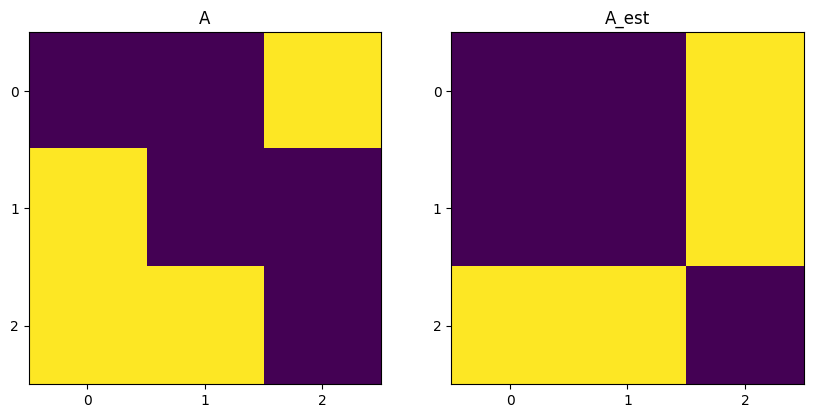

In [80]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.sign(A))
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.title("A")

plt.subplot(1, 2, 2)
plt.imshow(np.sign(A_est))
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.title("A_est")
plt.show()